<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/Perceptron_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

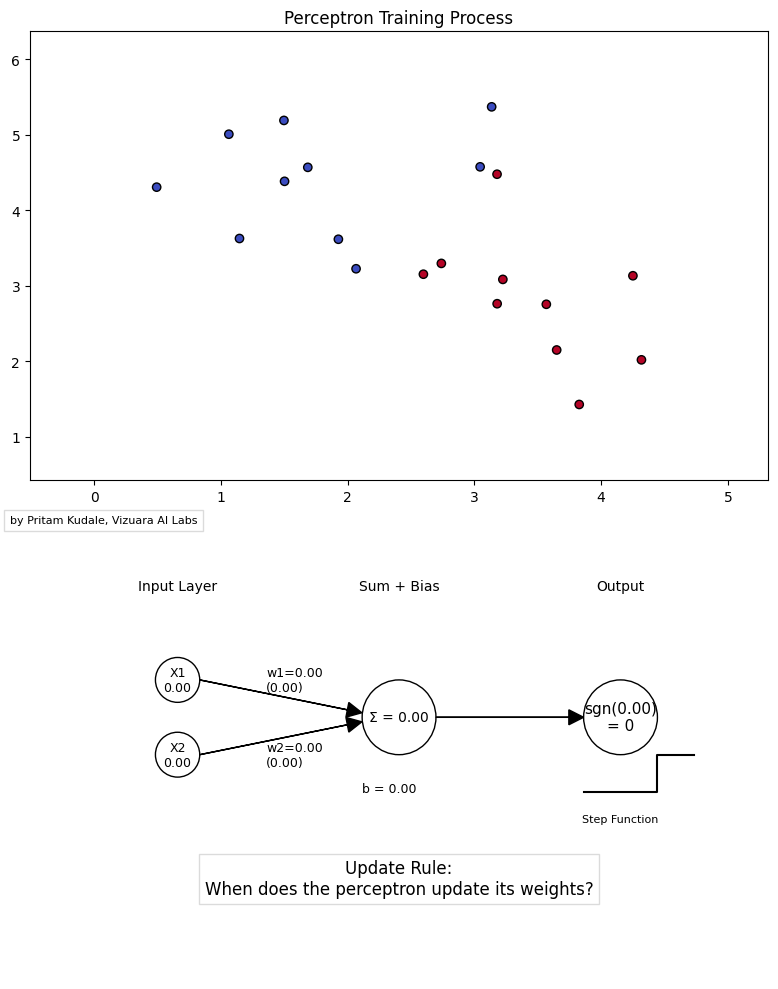

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs

# Generate synthetic data and train perceptron
X, y = make_blobs(n_samples=20, centers=2, n_features=2,
                  center_box=(0, 5), cluster_std=0.8, random_state=42)
y = np.where(y == 0, -1, 1)

w = np.zeros(2)
b = 0
history = []

converged = False
iteration = 0
while not converged:
    converged = True
    for i in range(len(X)):
        xi, yi = X[i], y[i]
        prediction = np.sign(np.dot(w, xi) + b)
        if prediction != yi:
            w += yi * xi
            b += yi
            history.append({
                'weights': w.copy(),
                'bias': b,
                'point': xi.copy(),
                'iteration': iteration
            })
            converged = False
            iteration += 1

# Create vertical layout figure
fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 1])

# Top subplot: Training visualization
ax1 = fig.add_subplot(gs[0])
ax1.set_xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
ax1.set_ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
ax1.set_title("Perceptron Training Process")
scatter = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
line, = ax1.plot([], [], 'k--')
highlight = ax1.scatter([], [], s=100, facecolors='none', edgecolors='g', linewidths=2)
train_text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, va='top',
                     bbox=dict(facecolor='white', alpha=0.8))

# Bottom subplot: Network structure
ax2 = fig.add_subplot(gs[1])
ax2.axis([0, 10, 0, 6])
ax2.axis('off')

# Static network elements
ax2.text(2, 5.2, "Input Layer", ha='center', fontsize=10)
ax2.text(5, 5.2, "Sum + Bias", ha='center', fontsize=10)
ax2.text(8, 5.2, "Output", ha='center', fontsize=10)

# Input nodes
input_nodes = [plt.Circle((2, 4 - i), 0.3, fc='white', ec='black') for i in range(2)]
[ax2.add_patch(node) for node in input_nodes]

# Weight labels
weight_labels = [ax2.text(3.2, 4 - i, f'w{i+1}=0.00', va='center', fontsize=9) for i in range(2)]

# Summation node
sum_node = plt.Circle((5, 3.5), 0.5, fc='white', ec='black')
ax2.add_patch(sum_node)

# Output node
output_node = plt.Circle((8, 3.5), 0.5, fc='white', ec='black')
ax2.add_patch(output_node)

# Arrows
ax2.arrow(2.3, 4, 2, -0.4, head_width=0.2, head_length=0.2, fc='k')
ax2.arrow(2.3, 3, 2, 0.4, head_width=0.2, head_length=0.2, fc='k')
ax2.arrow(5.5, 3.5, 1.8, 0, head_width=0.2, head_length=0.2, fc='k')

# Step function symbol
step_x = [7.5, 8.5, 8.5, 9.0]
step_y = [2.5, 2.5, 3.0, 3.0]
ax2.plot(step_x, step_y, 'k-', lw=1.5)
ax2.text(8, 2.2, 'Step Function', ha='center', va='top', fontsize=8)

# Update rule elements
update_question = ax2.text(5, 1.6,
                          "Update Rule:\nWhen does the perceptron update its weights?",
                          ha='center', va='top', fontsize=12,
                          bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

update_answer = ax2.text(5, 0.8,
                        "When prediction ≠ target:\n"
                        "w += y_i * x_i\n"
                        "b += y_i",
                        ha='center', va='top', fontsize=12,
                        color='darkgreen', visible=False)

created = ax2.text(1, 6.2, "by Pritam Kudale, Vizuara AI Labs",
                        ha='center', va='top', fontsize=8,
                        bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

# Dynamic network elements
input_texts = [ax2.text(2, 4 - i, f'X{i+1}\n0.00', ha='center', va='center', fontsize=9) for i in range(2)]
sum_text = ax2.text(5, 3.5, 'Σ = 0.00', ha='center', va='center', fontsize=10)
output_text = ax2.text(8, 3.5, 'sgn(0.00)\n= 0', ha='center', va='center', fontsize=11)
bias_text = ax2.text(4.5, 2.5, f'b = 0.00', fontsize=9)

def init():
    # Initialize training plot
    line.set_data([], [])
    highlight.set_offsets(np.empty((0, 2)))
    train_text.set_text('')

    # Initialize network plot
    for i in range(2):
        input_texts[i].set_text(f'X{i+1}\n0.00')
        weight_labels[i].set_text(f'w{i+1}=0.00\n(0.00)')
    sum_text.set_text('Σ = 0.00')
    output_text.set_text('sgn(0.00)\n= 0')
    bias_text.set_text(f'b = 0.00')
    update_answer.set_visible(False)

    return (line, highlight, train_text,
            *input_texts, *weight_labels,
            sum_text, output_text, bias_text, update_answer)

def update(frame):
    current = history[min(frame, len(history)-1)]
    w = current['weights']
    b_val = current['bias']
    point = current['point']
    iteration = current['iteration']

    # Update training plot
    xlim = ax1.get_xlim()
    if w[1] != 0:
        x = np.array(xlim)
        y_line = (-w[0] * x - b_val) / w[1]
    else:
        x_line = (-b_val) / w[0]
        y_min, y_max = ax1.get_ylim()
        x = np.array([x_line, x_line])
        y_line = np.array([y_min, y_max])
    line.set_data(x, y_line)
    highlight.set_offsets([point])
    train_text.set_text(f'Iteration: {iteration}\nWeights: [{w[0]:.2f}, {w[1]:.2f}]\nBias: {b_val:.2f}')

    # Update network plot
    X_sample = point
    weighted_sum = np.dot(w, X_sample) + b_val
    output = 1 if weighted_sum >= 0 else -1

    for i in range(2):
        input_texts[i].set_text(f'X{i+1}\n{X_sample[i]:.2f}')
        weight_labels[i].set_text(f'w{i+1}={w[i]:.2f}\n({w[i]*X_sample[i]:.2f})')

    sum_text.set_text(f'Σ = {weighted_sum:.2f}')
    output_text.set_text(f'sgn({weighted_sum:.2f})\n= {output}')
    bias_text.set_text(f'b = {b_val:.2f}')
    update_answer.set_visible(True)

    return (line, highlight, train_text,
            *input_texts, *weight_labels,
            sum_text, output_text, bias_text, update_answer)

# Animation parameters
extra_frames = 5  # Number of extra final frames (1 second each)
frame_sequence = list(range(len(history))) + [len(history)-1]*extra_frames

# Create animation
ani = FuncAnimation(fig, update, frames=frame_sequence,
                    init_func=init, blit=True, interval=1000, repeat=False)

plt.tight_layout()
plt.show()

# To save as GIF (uncomment next line)
ani.save('perceptron_animation.gif', writer='pillow', fps=1)